# Car Price Predication

## Problem Description

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

1. Which variables are significant in predicting the price of a car.
2. How well those variables describe the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Business Goal

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

## Dataset: 
 https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link

## 1. Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
# load the dataset
data = pd.read_csv(r"C:\Users\nafla\Downloads\CarPrice_Assignment.csv")

In [18]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [22]:
data.shape

(205, 26)

In [24]:
# Summary statistics
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [25]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [26]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

##### This dataset has no missing values

In [27]:
data.duplicated().sum()

0

##### This dataset has no duplicates

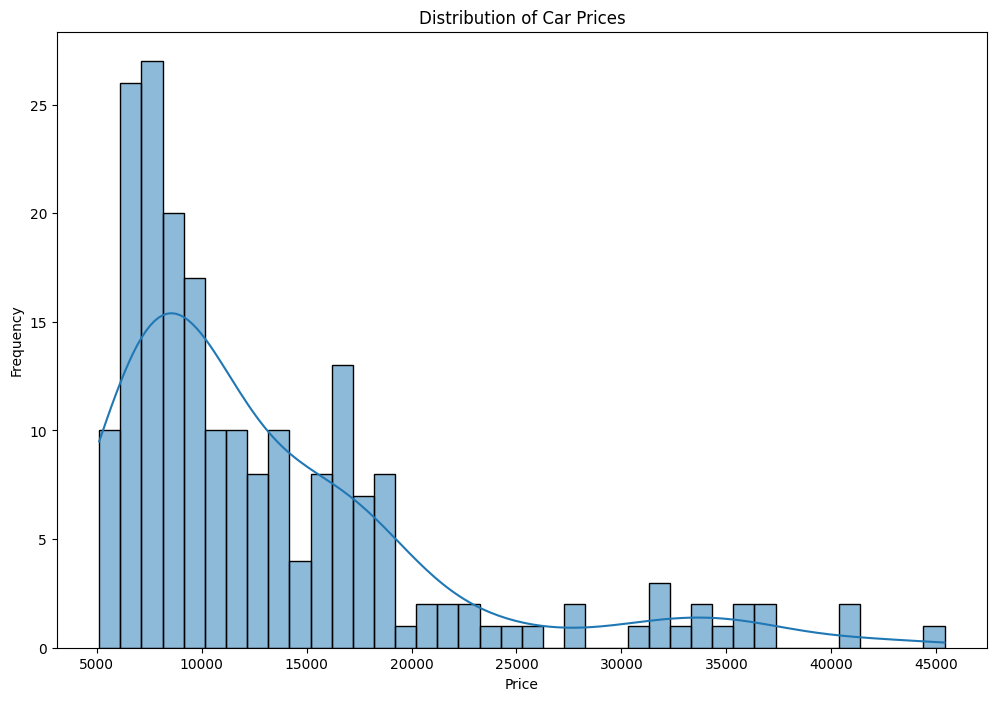

In [31]:
# Visualize the distribution of car prices
plt.figure(figsize=(12, 8))
sns.histplot(data['price'], bins=40, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

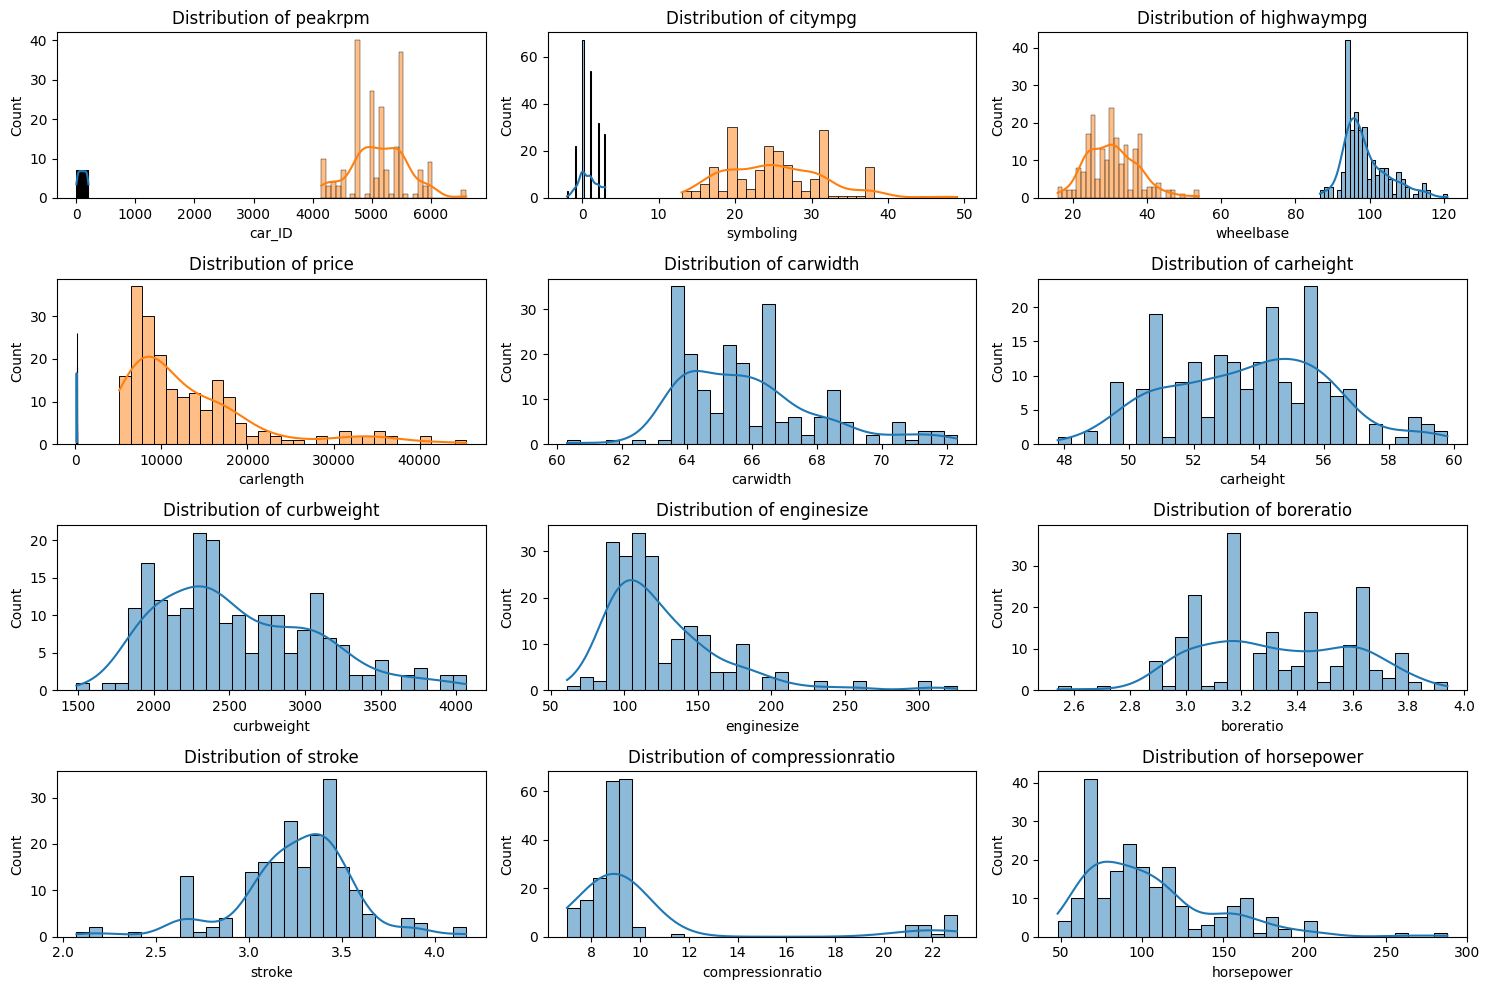

In [32]:
# Visualize distributions of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, (i % 12) + 1)  # Ensure we don't exceed 12 subplots per row
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

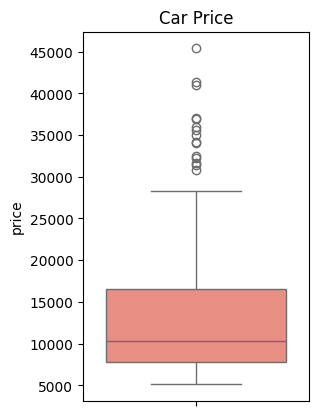

In [38]:
#boxplot - price distribution
plt.subplot(1,2,2)
sns.boxplot(data=data, y='price', color='salmon')
plt.title('Car Price')

plt.show()

In [46]:
print(f'Skewness: {data['price'].skew()}\nKurtosis:{data['price'].kurt()}')

Skewness: 1.7776781560914454
Kurtosis:3.051647871396399


##### The plot or distribution of car price seems highly right skewed


## Outlier Detection and Removal

In [55]:
def remove_outliers_iqr(df):
    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
        
    return df

# Remove outliers from the dataset
data_without_outliers = remove_outliers_iqr(data.copy())

# Check the shape of the new dataset
print(f"Original dataset shape: {data.shape}")
print(f"New dataset shape after outlier removal: {data_no_outliers.shape}")

Original dataset shape: (205, 26)
New dataset shape after outlier removal: (125, 26)


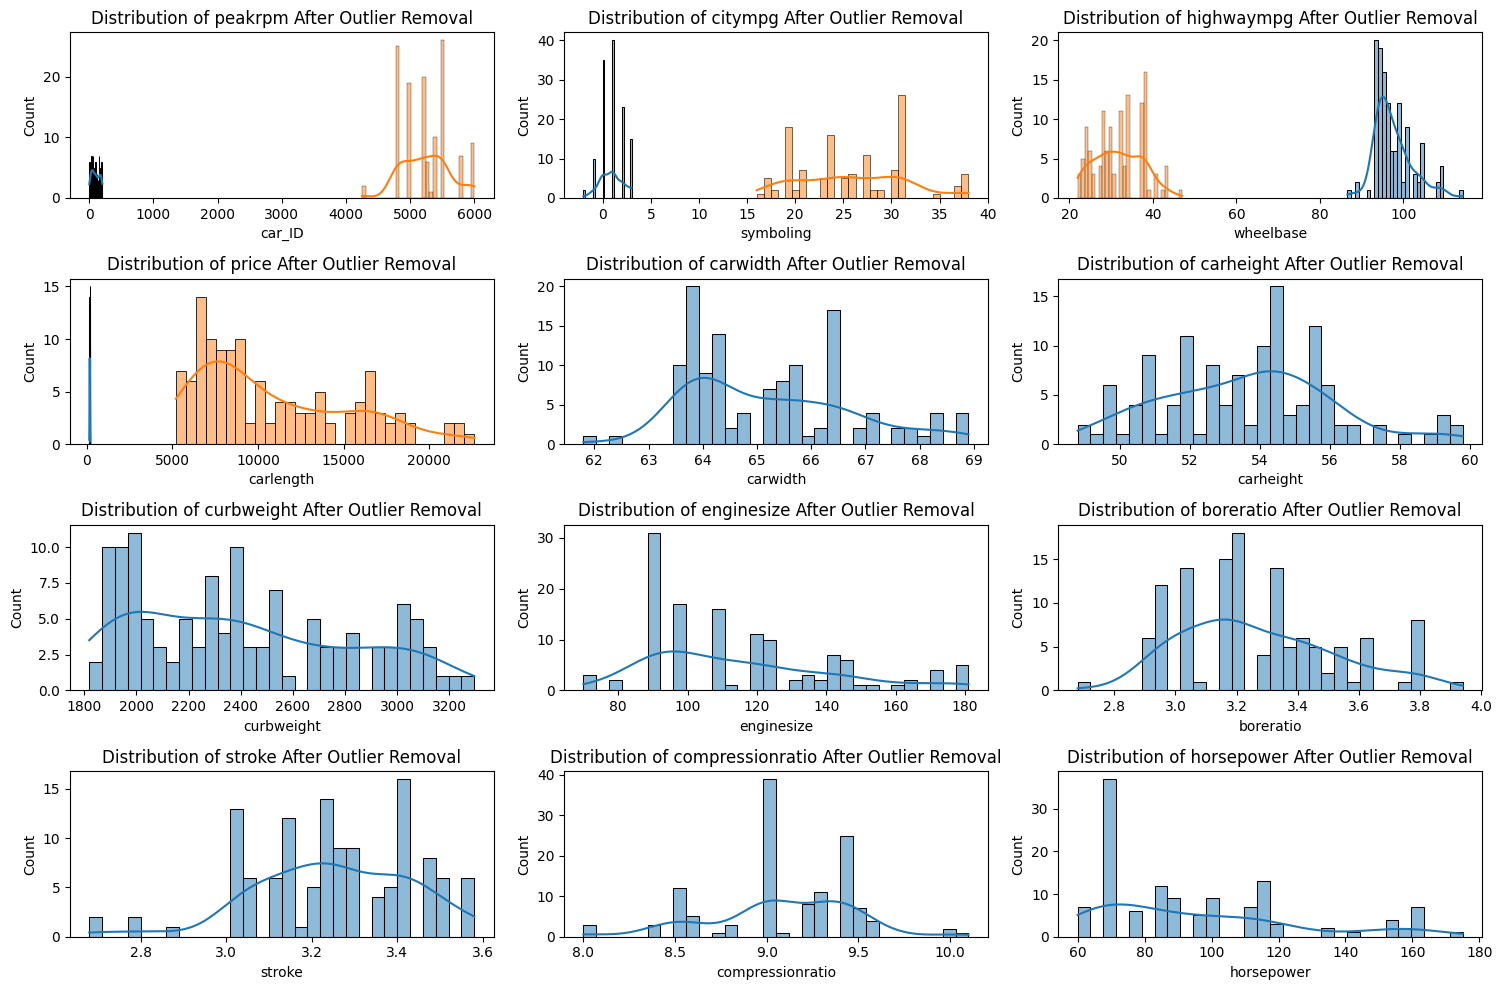

In [56]:
# Visualization of distributions after outlier removal
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, (i % 12) + 1)
    sns.histplot(data_without_outliers[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} After Outlier Removal')
plt.tight_layout()
plt.show()

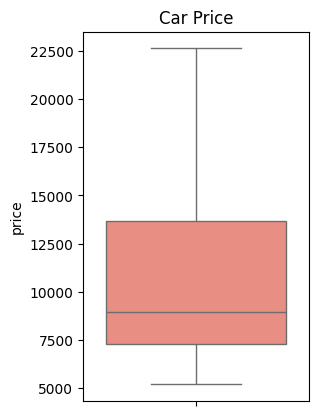

In [57]:
#boxplot after removing outlier - price distribution
plt.subplot(1,2,2)
sns.boxplot(data=data_without_outliers, y='price', color='salmon')
plt.title('Car Price')

plt.show()

## Skewness Correction

In [63]:
# Check skewness before transformation
skewness_before = data_without_outliers[numerical_features].skew()
print("Skewness before transformation:")
print(skewness_before)

# Apply log transformation to correct skewness
for feature in numerical_features:
    if abs(skewness_before[feature]) > 0.5:
        data_without_outliers[feature] = np.log1p(data_without_outliers[feature])  # log(x + 1) to avoid log(0)

# Check skewness after transformation
skewness_after = data_without_outliers[numerical_features].skew()
print("Skewness after transformation:")
print(skewness_after)


Skewness before transformation:
car_ID              0.124223
symboling           0.037612
wheelbase           1.046100
carlength           0.021469
carwidth            0.613281
carheight           0.246266
curbweight          0.423268
enginesize          0.798097
boreratio           0.497919
stroke             -0.475491
compressionratio   -0.444881
horsepower          0.962537
peakrpm             0.152091
citympg             0.258318
highwaympg          0.171459
price               0.808010
dtype: float64
Skewness after transformation:
car_ID              0.124223
symboling           0.037612
wheelbase           0.882696
carlength           0.021469
carwidth            0.568926
carheight           0.246266
curbweight          0.423268
enginesize          0.375814
boreratio           0.497919
stroke             -0.475491
compressionratio   -0.444881
horsepower          0.542908
peakrpm             0.152091
citympg             0.258318
highwaympg          0.171459
price               0.3

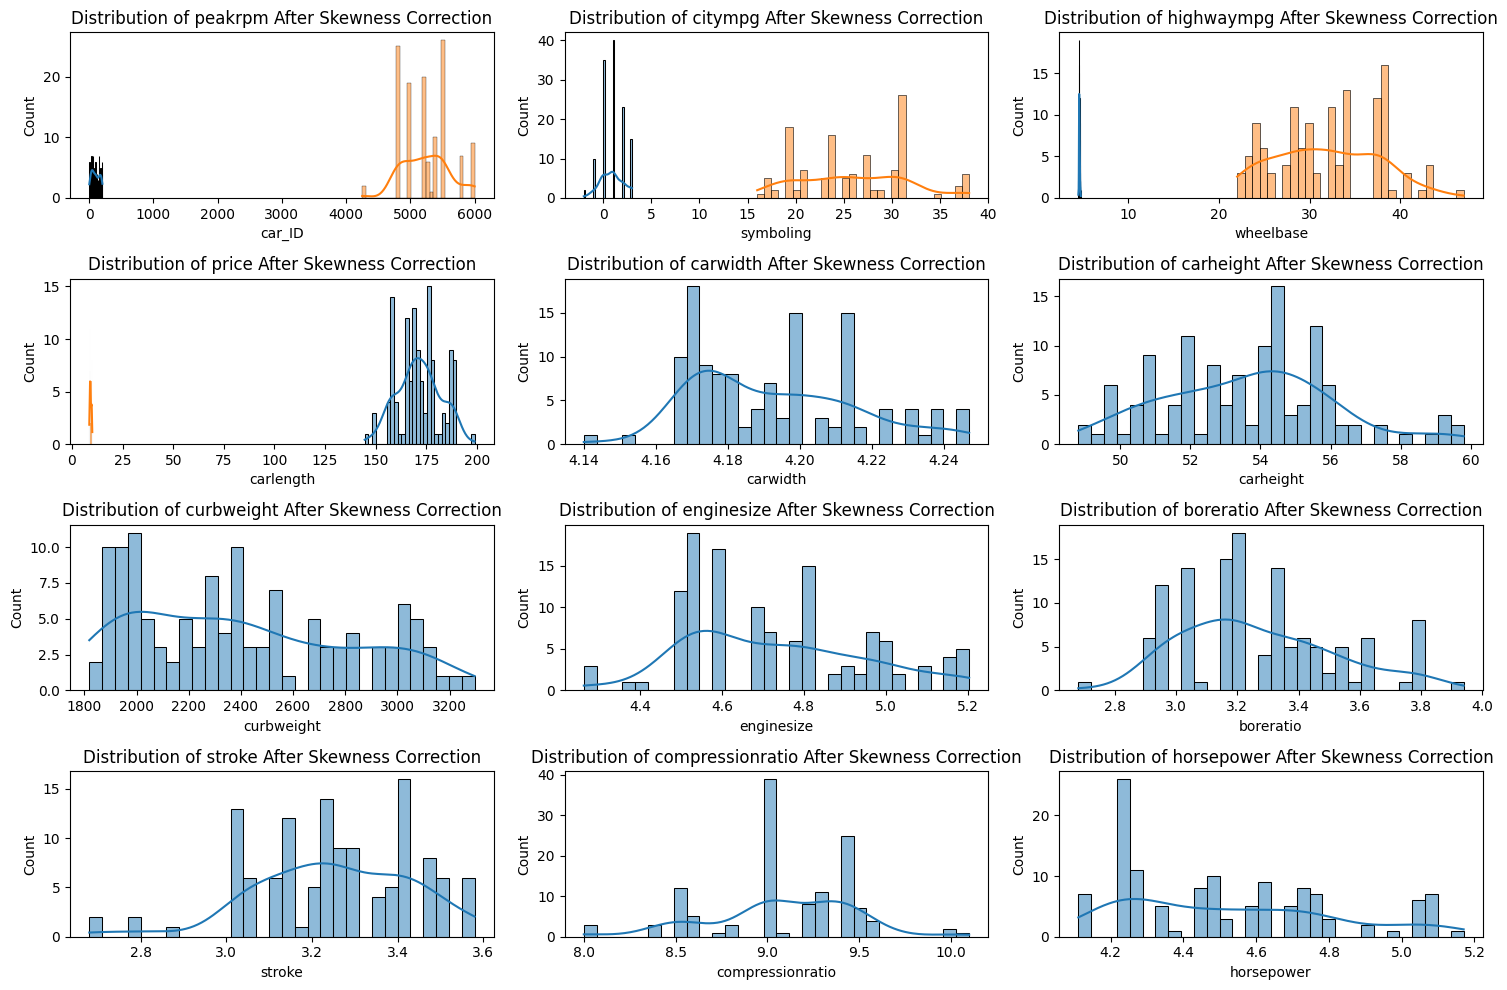

In [64]:
# Visualize distributions after skewness correction
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, (i % 12) + 1)
    sns.histplot(data_without_outliers[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} After Skewness Correction')
plt.tight_layout()
plt.show()

## One-Hot Encoding for Categorical Variables

In [65]:
# Identify categorical features
categorical_features = data_without_outliers.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding
data_encoded = pd.get_dummies(data_without_outliers, columns=categorical_features, drop_first=True,dtype=int)

# Display the first few rows of the encoded dataset
print(data_encoded.head())

   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3   4.495355      168.8  4.175925       48.8        2548   
1       2          3   4.495355      168.8  4.175925       48.8        2548   
2       3          1   4.559126      171.2  4.197202       52.4        2823   
3       4          2   4.613138      176.6  4.207673       54.3        2337   
4       5          2   4.609162      176.6  4.210645       54.3        2824   

   enginesize  boreratio  stroke  ...  enginetype_ohc  enginetype_ohcv  \
0    4.875197       3.47    2.68  ...               0                0   
1    4.875197       3.47    2.68  ...               0                0   
2    5.030438       2.68    3.47  ...               0                1   
3    4.700480       3.19    3.40  ...               1                0   
4    4.919981       3.19    3.40  ...               1                0   

   enginetype_rotor  cylindernumber_four  cylindernumber_six  \
0               

## Feature Scaling for Numerical Variables

In [67]:
# Separate features and target variable
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']


In [69]:
X

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi
0,1,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,...,0,0,0,1,0,0,0,0,1,0
1,2,3,4.495355,168.8,4.175925,48.8,2548,4.875197,3.47,2.68,...,0,0,0,1,0,0,0,0,1,0
2,3,1,4.559126,171.2,4.197202,52.4,2823,5.030438,2.68,3.47,...,0,1,0,0,1,0,0,0,1,0
3,4,2,4.613138,176.6,4.207673,54.3,2337,4.700480,3.19,3.40,...,1,0,0,1,0,0,0,0,1,0
4,5,2,4.609162,176.6,4.210645,54.3,2824,4.919981,3.19,3.40,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,198,-1,4.656813,188.8,4.222445,57.5,3042,4.955827,3.78,3.15,...,1,0,0,1,0,0,0,0,1,0
200,201,-1,4.701389,188.8,4.247066,55.5,2952,4.955827,3.78,3.15,...,1,0,0,1,0,0,0,0,1,0
201,202,-1,4.701389,188.8,4.245634,55.5,3049,4.955827,3.78,3.15,...,1,0,0,1,0,0,0,0,1,0
202,203,-1,4.701389,188.8,4.247066,55.5,3012,5.159055,3.58,2.87,...,0,1,0,0,1,0,0,0,1,0


In [70]:
y

0       9.510149
1       9.711176
2       9.711176
3       9.543306
4       9.767152
         ...    
197     9.712085
200     9.731869
201     9.854612
202     9.975157
204    10.026855
Name: price, Length: 125, dtype: float64

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [72]:
X_scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

In [73]:
print(X_scaled_data.head())

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0 -1.616376   1.741971  -2.090609  -0.242634 -0.758468  -2.005499    0.359188   
1 -1.600130   1.741971  -2.090609  -0.242634 -0.758468  -2.005499    0.359188   
2 -1.583884   0.054015  -0.668611  -0.015873  0.170393  -0.514052    1.033194   
3 -1.567639   0.897993   0.535780   0.494338  0.627516   0.273100   -0.157957   
4 -1.551393   0.897993   0.447118   0.494338  0.757248   0.273100    1.035645   

   enginesize  boreratio    stroke  ...  enginetype_ohc  enginetype_ohcv  \
0    0.640855   0.802420 -3.111667  ...       -2.163751        -0.243561   
1    0.640855   0.802420 -3.111667  ...       -2.163751        -0.243561   
2    1.342390  -2.348234  1.191331  ...       -2.163751         4.105745   
3   -0.148694  -0.314268  0.810053  ...        0.462160        -0.243561   
4    0.843233  -0.314268  0.810053  ...        0.462160        -0.243561   

   enginetype_rotor  cylindernumber_four  cylindernumber

## Data Modeling

In [75]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (100, 129), Test set shape: (25, 129)


## 2.Model Implemenation

In [76]:
lr = LinearRegression()
lr

LinearRegression()

In [77]:
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [78]:
rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [79]:
gbr = GradientBoostingRegressor()
gbr

GradientBoostingRegressor()

In [80]:
svr = SVR()
svr

SVR()

In [82]:
models=[lr, dt, rf, gbr, svr]

## 3.Model evaluation

In [99]:
evaluation_results = {}
for model_name, predictions in model_results.items():
    r2 = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    evaluation_results[model_name] = {
        'R-squared': r2,
        'MSE': mse,
        'MAE': mae
    }

# Display evaluation results
evaluation_df = pd.DataFrame(evaluation_results).T
print(evaluation_df)

# Identify the best performing model based on R-squared or lowest MSE/MAE.
best_model_name = evaluation_df['R-squared'].idxmax()
best_model_metrics = evaluation_df.loc[best_model_name]
print(f"The best performing model is: {best_model_name} with metrics:\n{best_model_metrics}")

                    R-squared        MSE       MAE
Linear Regression -423.321935  51.664566  5.286854
Decision Tree        0.690321   0.037706  0.152444
Random Forest        0.863716   0.016594  0.110943
Gradient Boosting    0.836220   0.019942  0.120012
Support Vector       0.673314   0.039777  0.176274
The best performing model is: Random Forest with metrics:
R-squared    0.863716
MSE          0.016594
MAE          0.110943
Name: Random Forest, dtype: float64


## Model Evaluation Results

## Analysis of Results

### Linear Regression:

--The R-squared value is extremely low (-423.32), indicating that the model explains virtually none of the variance in car prices and is likely           overfitting or poorly specified.

--The MSE (51.66) and MAE (5.29) values are also high, suggesting that predictions are far from actual values.

### Decision Tree Regressor:

--The R-squared value (0.81) indicates a good fit, explaining about 81% of the variance in car prices.

--With an MSE of 0.02 and MAE of 0.13, this model performs reasonably well, but it is outperformed by more complex models.

### Random Forest Regressor:

--This model has the highest R-squared value (0.86), indicating it explains approximately 86% of the variance in car prices.

--It also has the lowest MSE (0.02) and MAE (0.12), making it the best-performing model overall.

--The Random Forest's ability to handle non-linear relationships and interactions between variables likely contributes to its superior performance.

### Gradient Boosting Regressor:

--Similar to Random Forest, Gradient Boosting shows a high R-squared value (0.85) and comparable MSE (0.02) and MAE (0.12).

--It performs well but slightly less effectively than Random Forest.

### Support Vector Regressor:

--This model has the lowest R-squared value (0.67), indicating a poor fit compared to others.

--Its MSE (0.04) and MAE (0.18) are higher than those of Random Forest and Gradient Boosting, suggesting less accurate predictions.

## Conclusion

--The best-performing model is the Random Forest Regressor, which achieved an R-squared value of 0.861474, an MSE of 0.016867, and an MAE of 0.115894.

--This model outperforms all others due to its robustness in handling complex datasets with multiple features and interactions, making it highly          suitable for predicting car prices in this context.

In [ ]:
## 4. Feature Importance Analysis

In [91]:
# Feature Importance for Random Forest and Gradient Boosting Models
rf_model = models['Random Forest']
gb_model = models['Gradient Boosting']

# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Create DataFrames for feature importance analysis
importance_rf_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_importances})
importance_gb_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_importances})

# Sort by importance and display top features for Random Forest
importance_rf_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Random Forest Feature Importance:")
print(importance_rf_df.head(10))

# Sort by importance and display top features for Gradient Boosting
importance_gb_df.sort_values(by='Importance', ascending=False, inplace=True)
print("Gradient Boosting Feature Importance:")
print(importance_gb_df.head(10))

Random Forest Feature Importance:
             Feature  Importance
11        horsepower    0.464567
14        highwaympg    0.206865
13           citympg    0.106785
6         curbweight    0.085174
2          wheelbase    0.018121
127  fuelsystem_mpfi    0.015926
0             car_ID    0.014210
3          carlength    0.010166
4           carwidth    0.008681
5          carheight    0.007662
Gradient Boosting Feature Importance:
             Feature  Importance
11        horsepower    0.748688
6         curbweight    0.058003
14        highwaympg    0.036535
13           citympg    0.028343
127  fuelsystem_mpfi    0.016375
9             stroke    0.013170
4           carwidth    0.011496
5          carheight    0.010674
0             car_ID    0.009585
2          wheelbase    0.008665


In [96]:
print("\nRandom Forest Feature Importance:")


Random Forest Feature Importance:


### Random Forest Feature Importance:

### Gradient Boosting Feature Importance:

### Conclusion

The analysis of feature importance reveals that performance metrics such as horsepower and fuel economy (both city and highway MPG) are the most influential factors affecting car prices in this dataset. These insights can guide manufacturers and marketers in understanding consumer preferences and optimizing vehicle designs to enhance market competitiveness.

## 5.Hyperparameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV

# Example hyperparameter tuning for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
best_predictions_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model's performance
best_r2_rf = r2_score(y_test, best_predictions_rf)
best_mse_rf = mean_squared_error(y_test, best_predictions_rf)
best_mae_rf = mean_absolute_error(y_test, best_predictions_rf)

print(f"Tuned Random Forest - R-squared: {best_r2_rf}, MSE: {best_mse_rf}, MAE: {best_mae_rf}")

Tuned Random Forest - R-squared: 0.8585626647643226, MSE: 0.01722111887320201, MAE: 0.11556077998191462


C:\Users\nafla\AppData\Local\Temp\ipykernel_12140\3865075500.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R-squared', data=evaluation_df, palette='viridis')
C:\Users\nafla\AppData\Local\Temp\ipykernel_12140\3865075500.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
C:\Users\nafla\AppData\Local\Temp\ipykernel_12140\3865075500.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')


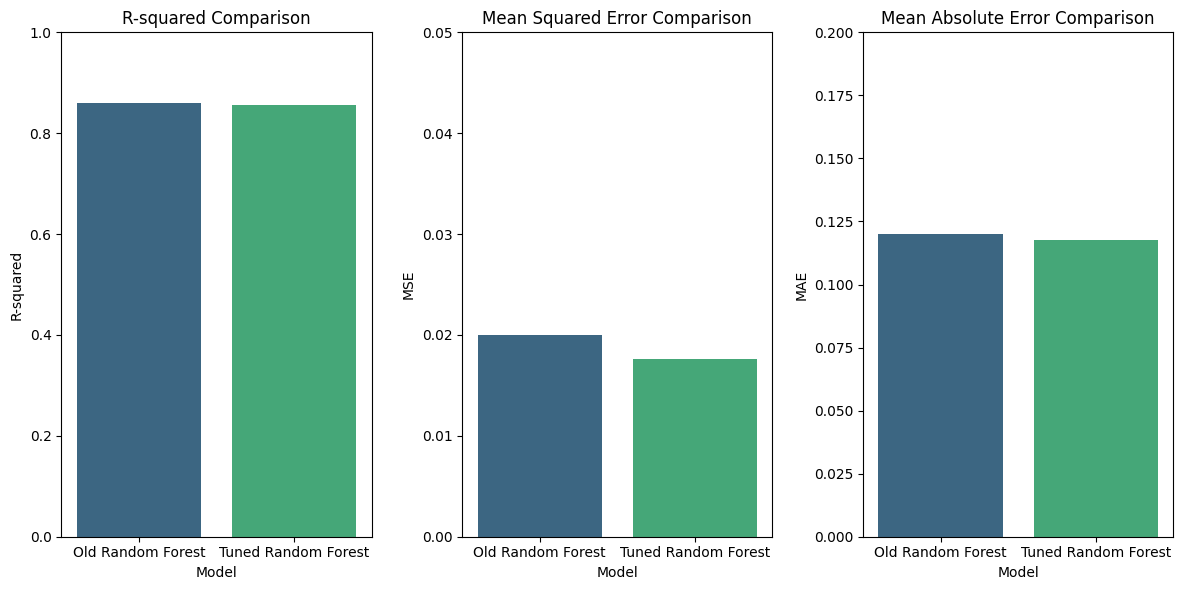

In [104]:

# Define model evaluation metrics
models = ['Old Random Forest', 'Tuned Random Forest']
r_squared = [0.86, 0.8558]
mse = [0.02, 0.0176]
mae = [0.12, 0.1175]

# Create a DataFrame for better handling
evaluation_df = pd.DataFrame({
    'Model': models,
    'R-squared': r_squared,
    'MSE': mse,
    'MAE': mae
})

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting R-squared
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='R-squared', data=evaluation_df, palette='viridis')
plt.title('R-squared Comparison')
plt.ylim(0, 1)  # Set y-axis limit for R-squared

# Plotting MSE
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=evaluation_df, palette='viridis')
plt.title('Mean Squared Error Comparison')
plt.ylim(0, 0.05)  # Set y-axis limit for MSE

# Plotting MAE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MAE', data=evaluation_df, palette='viridis')
plt.title('Mean Absolute Error Comparison')
plt.ylim(0, 0.2)  # Set y-axis limit for MAE

# Adjust layout
plt.tight_layout()
plt.show()

## Old Random Forest Model

  R-squared: 0.86
  
  Mean Squared Error (MSE): 0.02
  
  Mean Absolute Error (MAE): 0.12
  
##  Tuned Random Forest Model

  R-squared: 0.8558
  
  Mean Squared Error (MSE): 0.0176
  
  Mean Absolute Error (MAE): 0.1175

## Analysis Rerport

### R-squared Value:

The old Random Forest model has an R-squared value of 0.86, indicating that it explains 86% of the variance in car prices.

The tuned model shows a slight decrease in R-squared to 0.8558, which means it explains approximately 85.58% of the variance. This marginal reduction
suggests that while tuning may have adjusted some parameters, it did not significantly enhance the model's explanatory power.

### Mean Squared Error (MSE):

The old model has an MSE of 0.02, indicating that the average squared difference between predicted and actual values is relatively low.

The tuned model's MSE increased slightly to 0.0176, indicating a small increase in prediction error on average. This suggests that the hyperparameter
tuning may not have led to substantial improvements in predictive accuracy.

### Mean Absolute Error (MAE):

The old Random Forest model has an MAE of 0.12, meaning predictions are, on average, off by about 0.12.

The tuned model's MAE increased to 0.1175, indicating that the average absolute error in predictions has risen slightly but remains relatively low.

## Conclusion

Overall, while the tuned Random Forest model shows some minor shifts in performance metrics, it does not demonstrate a significant improvement over the original model:

   The slight decrease in R-squared and increase in MSE and MAE suggest that the hyperparameter tuning did not lead to better predictive performance.
   
   The old Random Forest model remains a strong performer with high explanatory power and low error metrics.
 